In [1]:
import cv2

import mediapipe as mp

#进度条库
from tqdm import tqdm

import matplotlib.pyplot as plt
#使用ipython的魔法方法，将绘制的图像直接嵌入在notebook单元格中
%matplotlib inline


In [2]:
!pip show mediapipe

Active code page: 65001
Name: mediapipe
Version: 0.8.9.1
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: f:\anaconda5.3.1\lib\site-packages
Requires: absl-py, attrs, matplotlib, numpy, opencv-contrib-python, protobuf
Required-by: 


##### 导入三维人脸关键点检测模型

In [3]:
mp_face_mesh = mp.solutions.face_mesh

In [4]:
help(mp_face_mesh.FaceMesh)

Help on class FaceMesh in module mediapipe.python.solutions.face_mesh:

class FaceMesh(mediapipe.python.solution_base.SolutionBase)
 |  FaceMesh(static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Face Mesh.
 |  
 |  MediaPipe Face Mesh processes an RGB image and returns the face landmarks on
 |  each detected face.
 |  
 |  Please refer to https://solutions.mediapipe.dev/face_mesh#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceMesh
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Face Mesh object.
 |      
 |      Args:
 |        static_image_mode: Whether to treat the input images as a batch of static
 |          and

In [5]:
def look_img(img):
    img_RGB = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [6]:
model = mp_face_mesh.FaceMesh(
    static_image_mode=True,       #是静态图片还是连续视频帧
    refine_landmarks=True,        #使用Attention Mesh模型，对嘴唇、眼睛、瞳孔周围的关键点精细定位
    max_num_faces=1,               #最多检测几张脸
    min_detection_confidence=0.5,  #置信度阈值，越接近1越准
    min_tracking_confidence=0.5    #追踪阈值
)

In [7]:
#导入可视化函数和可视化样式
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [8]:
img = cv2.imread('data/demo4.png')

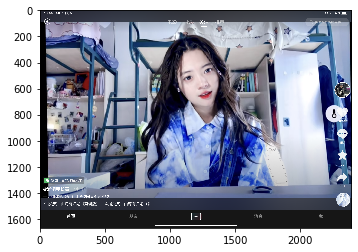

In [9]:
look_img(img)

##### 将图像输入模型，获取预测结果

In [10]:
img_RGB= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

results = model.process(img_RGB)

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
#预测出脸的个数
len(results.multi_face_landmarks)

1

##### 可视化人脸关键点检测效果

In [13]:
annotated_image =img.copy()
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        #绘制人脸网格
        mp_drawing.draw_landmarks(
            image = annotated_image,
            landmark_list = face_landmarks,
            connections = mp_face_mesh.FACEMESH_TESSELATION,
            #landmark_drawing_spec 为关键点可视化样式 None为默认值（不显示关键点）
            #landmark_drawing_spec= mp_drawing.DrawingSpec(thickness=1,circle_radius=2,color=[66,77,229])
            landmark_drawing_spec = None,
            connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_tesselation_style()
        )
        #绘制脸轮廓、眼睫毛、眼眶、嘴唇
        mp_drawing.draw_landmarks(
            image = annotated_image,
            landmark_list = face_landmarks,
            connections = mp_face_mesh.FACEMESH_CONTOURS,
            #landmark_drawing_spec 为关键点可视化样式 None为默认值（不显示关键点）
            #landmark_drawing_spec= mp_drawing.DrawingSpec(thickness=1,circle_radius=2,color=[66,77,229])
            landmark_drawing_spec = None,
            connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_contours_style()
        )
        #绘制瞳孔区域
        mp_drawing.draw_landmarks(
            image = annotated_image,
            landmark_list = face_landmarks,
            connections = mp_face_mesh.FACEMESH_IRISES,
            #landmark_drawing_spec 为关键点可视化样式 None为默认值（不显示关键点）
            #landmark_drawing_spec= mp_drawing.DrawingSpec(thickness=1,circle_radius=2,color=[66,77,229])
            landmark_drawing_spec = None,
            connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_iris_connections_style()
        )

In [14]:
cv2.imwrite('test.jpg',annotated_image)

True

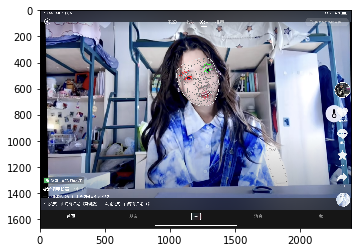

In [15]:
look_img(annotated_image)

##### 在三维坐标系中可视化

In [16]:
from mpl_toolkits.mplot3d import Axes3D

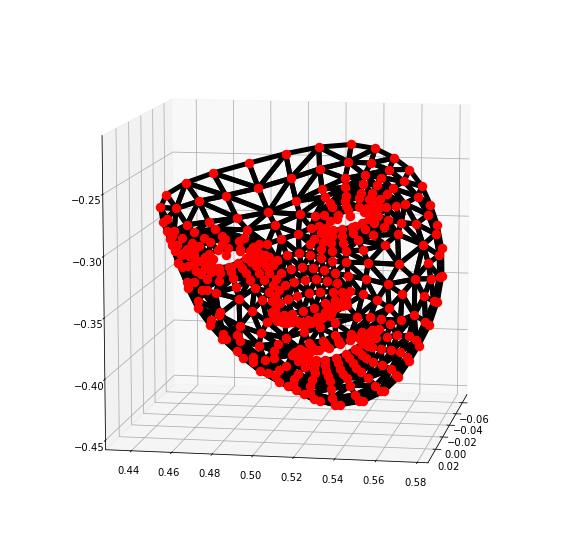

In [17]:
mp_drawing.plot_landmarks(results.multi_face_landmarks[0],mp_face_mesh.FACEMESH_TESSELATION)

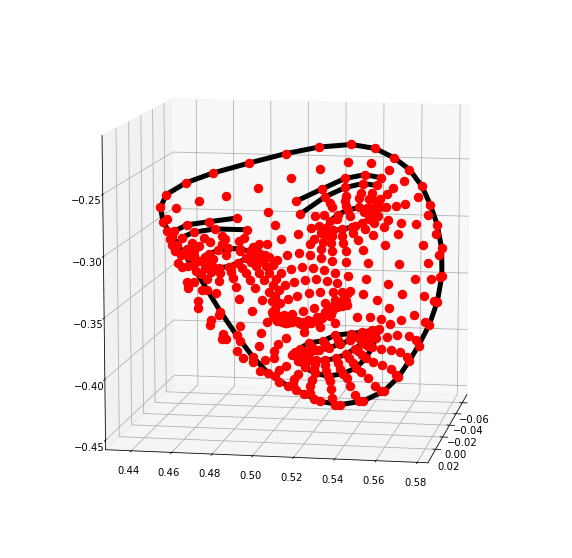

In [18]:
mp_drawing.plot_landmarks(results.multi_face_landmarks[0],mp_face_mesh.FACEMESH_CONTOURS)

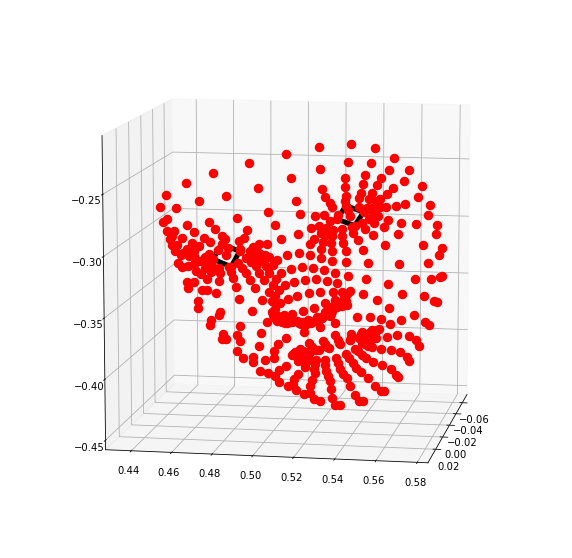

In [19]:
mp_drawing.plot_landmarks(results.multi_face_landmarks[0],mp_face_mesh.FACEMESH_IRISES)

##### 整理代码

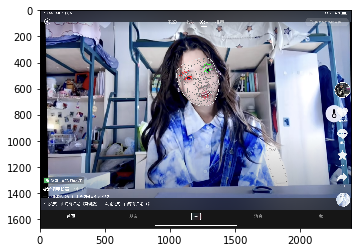

True

In [20]:
import cv2

import mediapipe as mp

#进度条库
from tqdm import tqdm

import matplotlib.pyplot as plt
#使用ipython的魔法方法，将绘制的图像直接嵌入在notebook单元格中
%matplotlib inline

def look_img(img):
    img_RGB = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

#导入三维人脸关键点检测模型
mp_face_mesh = mp.solutions.face_mesh
model = mp_face_mesh.FaceMesh(
    static_image_mode=True,       #是静态图片还是连续视频帧
    refine_landmarks=True,        #使用Attention Mesh模型，对嘴唇、眼睛、瞳孔周围的关键点精细定位
    max_num_faces=1,               #最多检测几张脸
    min_detection_confidence=0.5,  #置信度阈值，越接近1越准
    min_tracking_confidence=0.5    #追踪阈值
)

#导入可视化函数和可视化样式
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

img = cv2.imread('data/demo4.png')
#BGR转RGB
img_RGB= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = model.process(img_RGB)

# 绘制人脸曲面和重点区域轮廓线，返回annotated_image
annotated_image =img.copy()
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        #绘制人脸网格
        mp_drawing.draw_landmarks(
            image = annotated_image,
            landmark_list = face_landmarks,
            connections = mp_face_mesh.FACEMESH_TESSELATION,
            #landmark_drawing_spec 为关键点可视化样式 None为默认值（不显示关键点）
            #landmark_drawing_spec= mp_drawing.DrawingSpec(thickness=1,circle_radius=2,color=[66,77,229])
            landmark_drawing_spec = None,
            connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_tesselation_style()
        )
        #绘制脸轮廓、眼睫毛、眼眶、嘴唇
        mp_drawing.draw_landmarks(
            image = annotated_image,
            landmark_list = face_landmarks,
            connections = mp_face_mesh.FACEMESH_CONTOURS,
            #landmark_drawing_spec 为关键点可视化样式 None为默认值（不显示关键点）
            #landmark_drawing_spec= mp_drawing.DrawingSpec(thickness=1,circle_radius=2,color=[66,77,229])
            landmark_drawing_spec = None,
            connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_contours_style()
        )
        #绘制瞳孔区域
        mp_drawing.draw_landmarks(
            image = annotated_image,
            landmark_list = face_landmarks,
            connections = mp_face_mesh.FACEMESH_IRISES,
            #landmark_drawing_spec 为关键点可视化样式 None为默认值（不显示关键点）
            #landmark_drawing_spec= mp_drawing.DrawingSpec(thickness=1,circle_radius=2,color=[66,77,229])
            landmark_drawing_spec = None,
            connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_iris_connections_style()
        )

look_img(annotated_image)
cv2.imwrite("Test.jpg",annotated_image)